# Regressão Logística

## Dataset de Previsão e Detecção de Risco de Crédito

Variável target ou classe:<br />
credit.rating<br />
1 - concedeu crédito<br />
0 - não concedeu crédito

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [3]:
df = pd.read_csv('credit_dataset_final.csv')
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
df.columns

Index(['credit.rating', 'account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker'],
      dtype='object')

## Análise Exploratória

In [5]:
# variavél target ou classe
df['credit.rating'].value_counts()

1    700
0    300
Name: credit.rating, dtype: int64

In [7]:
print(df.describe())

       credit.rating  account.balance  credit.duration.months  \
count    1000.000000      1000.000000             1000.000000   
mean        0.700000         2.183000               20.903000   
std         0.458487         0.835589               12.058814   
min         0.000000         1.000000                4.000000   
25%         0.000000         1.000000               12.000000   
50%         1.000000         2.000000               18.000000   
75%         1.000000         3.000000               24.000000   
max         1.000000         3.000000               72.000000   

       previous.credit.payment.status  credit.purpose  credit.amount  \
count                     1000.000000     1000.000000     1000.00000   
mean                         2.292000        2.965000     3271.24800   
std                          0.620581        0.971967     2822.75176   
min                          1.000000        1.000000      250.00000   
25%                          2.000000        2.000000 

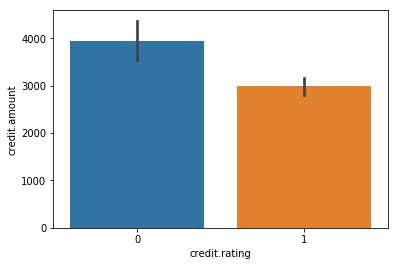

In [10]:
import seaborn as sns
sns.barplot(x='credit.rating',y='credit.amount', data=df)

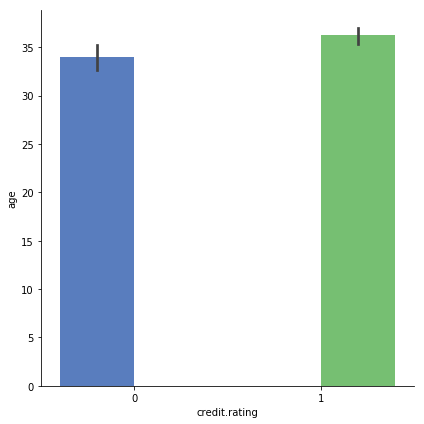

In [24]:
sns.factorplot(x='credit.rating', y='age', hue='credit.rating', data=df,
                   size=6, kind="bar", palette="muted")

In [26]:
df.age.mean()

35.542

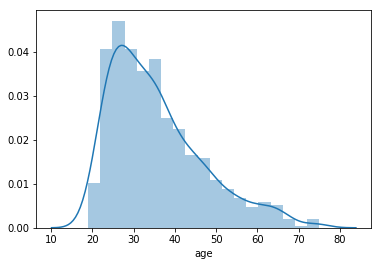

In [25]:
sns.distplot(df.age)

## Definindo X e Y

In [27]:
X = df.iloc[:,1:].values.astype(float)
y = df.iloc[:,0]

In [28]:
type(X)

numpy.ndarray

In [29]:
type(y)

pandas.core.series.Series

In [30]:
X[:3]

array([[1.000e+00, 1.800e+01, 3.000e+00, 2.000e+00, 1.049e+03, 1.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 2.000e+00,
        2.100e+01, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00],
       [1.000e+00, 9.000e+00, 3.000e+00, 4.000e+00, 2.799e+03, 1.000e+00,
        2.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        3.600e+01, 2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00],
       [2.000e+00, 1.200e+01, 2.000e+00, 4.000e+00, 8.410e+02, 2.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        2.300e+01, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]])

In [31]:
y[:3]

0    1
1    1
2    1
Name: credit.rating, dtype: int64

## Preparando os dados para aplicar Regressão Logistica<br />
## Colocando os dados em Escala

In [104]:
X.shape

(1000, 20)

In [105]:
standardization = StandardScaler()
standardization.fit(X)
Xst = standardization.transform(X)
print('Dataset Original')
X[:5].astype(int)

Dataset Original


array([[   1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,    4,
           2,   21,    2,    1,    1,    3,    1,    1,    1],
       [   1,    9,    3,    4, 2799,    1,    2,    2,    3,    1,    2,
           1,   36,    2,    1,    2,    3,    2,    1,    1],
       [   2,   12,    2,    4,  841,    2,    3,    2,    1,    1,    4,
           1,   23,    2,    1,    1,    2,    1,    1,    1],
       [   1,   12,    3,    4, 2122,    1,    2,    3,    3,    1,    2,
           1,   39,    2,    1,    2,    2,    2,    1,    2],
       [   1,   12,    3,    4, 2171,    1,    2,    4,    3,    1,    4,
           2,   38,    1,    2,    2,    2,    1,    1,    2]])

In [93]:
print('Dataset Em Escala')
Xst[:5]

Dataset Em Escala


array([[-1.41647598, -0.24085723,  1.14143673, -0.99332892, -0.78765692,
        -0.73084383, -1.30856567,  0.91847717, -1.28634145, -0.32021217,
         1.04698668, -0.3410551 , -1.28157308,  0.47801802, -1.75120525,
        -0.76143209,  0.14694918, -0.42828957, -0.82331789, -0.19601428],
       [-1.41647598, -0.9875727 ,  1.14143673,  1.06538387, -0.16738429,
        -0.73084383, -0.40361016, -0.87018333,  0.58879186, -0.32021217,
        -0.76597727, -1.29372298,  0.04036312,  0.47801802, -1.75120525,
         1.31331475,  0.14694918,  2.33486893, -0.82331789, -0.19601428],
       [-0.21911674, -0.73866754, -0.47076204,  1.06538387, -0.86138075,
         0.10536193,  0.50134535, -0.87018333, -1.28634145, -0.32021217,
         1.04698668, -1.29372298, -1.10531492,  0.47801802, -1.75120525,
        -0.76143209, -1.38377145, -0.42828957, -0.82331789, -0.19601428],
       [-1.41647598, -0.73866754,  1.14143673,  1.06538387, -0.40734119,
        -0.73084383, -0.40361016,  0.02414692,  

## Aplicando o Algoritmo

In [34]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(Xst, y)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Avaliando A Acurácia do Modelo

In [35]:
# check the accuracy on the training set
model.score(Xst, y)

0.775

### Examinando os Coeficientes

In [36]:
cols = df.columns.values
cols

array(['credit.rating', 'account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose',
       'credit.amount', 'savings', 'employment.duration',
       'installment.rate', 'marital.status', 'guarantor',
       'residence.duration', 'current.assets', 'age', 'other.credits',
       'apartment.type', 'bank.credits', 'occupation', 'dependents',
       'telephone', 'foreign.worker'], dtype=object)

In [37]:
cols_atributos = cols[1:]
cols_atributos

array(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose',
       'credit.amount', 'savings', 'employment.duration',
       'installment.rate', 'marital.status', 'guarantor',
       'residence.duration', 'current.assets', 'age', 'other.credits',
       'apartment.type', 'bank.credits', 'occupation', 'dependents',
       'telephone', 'foreign.worker'], dtype=object)

In [38]:
len(cols_atributos)

20

In [39]:
model.coef_[0]

array([ 0.67064222, -0.27669158,  0.36111941, -0.35777913, -0.30747001,
        0.3676245 ,  0.2053669 , -0.29253095,  0.20036286,  0.0942617 ,
       -0.03960407, -0.24420229,  0.09899829,  0.14170967,  0.14903121,
       -0.08787836, -0.03044483, -0.05360281,  0.16686263,  0.24558817])

In [40]:
len(model.coef_[0])

20

In [41]:
# examine the coefficients
elementos = [[x,y] for x, y in zip(cols_atributos, model.coef_[0])]
elementos

[['account.balance', 0.6706422196200342],
 ['credit.duration.months', -0.27669158436952546],
 ['previous.credit.payment.status', 0.3611194071799876],
 ['credit.purpose', -0.3577791330647178],
 ['credit.amount', -0.30747000821433046],
 ['savings', 0.36762450373956435],
 ['employment.duration', 0.2053668963550472],
 ['installment.rate', -0.2925309466930865],
 ['marital.status', 0.20036285645183424],
 ['guarantor', 0.0942616957484897],
 ['residence.duration', -0.03960406900848035],
 ['current.assets', -0.2442022942586589],
 ['age', 0.09899829241768397],
 ['other.credits', 0.1417096742671958],
 ['apartment.type', 0.1490312115088366],
 ['bank.credits', -0.0878783605991199],
 ['occupation', -0.030444834205835217],
 ['dependents', -0.05360280931832768],
 ['telephone', 0.16686262546906416],
 ['foreign.worker', 0.2455881669841193]]

In [42]:
# examine the coefficients
pd.DataFrame(elementos, columns=['Atributo', 'Coeficiente'])

,Atributo,Coeficiente
0,account.balance,0.670642
1,credit.duration.months,-0.276692
2,previous.credit.payment.status,0.361119
3,credit.purpose,-0.357779
4,credit.amount,-0.307470
5,savings,0.367625
6,employment.duration,0.205367
7,installment.rate,-0.292531
8,marital.status,0.200363
9,guarantor,0.094262


## Avaliando o modelo usando split de dados

In [43]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xst, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
model2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print (predicted[:5])

[1 0 1 1 0]


In [45]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs[:5])

[[0.34614015 0.65385985]
 [0.50576614 0.49423386]
 [0.13488831 0.86511169]
 [0.09869362 0.90130638]
 [0.50304835 0.49695165]]


In [46]:
print('Valores Previstos e suas Probalidades')
elementos = [[x,y] for x, y in zip(predicted,probs)]
elementos
df2 = pd.DataFrame(elementos, columns=['Classe', 'Probabilidade'])
df2.head(10)

Valores Previstos e suas Probalidades


,Classe,Probabilidade
0,1,"[0.34614015315095203, 0.653859846849048]"
1,0,"[0.5057661375308902, 0.4942338624691098]"
2,1,"[0.13488830921011485, 0.8651116907898851]"
3,1,"[0.09869361786030684, 0.9013063821396932]"
4,0,"[0.503048353413627, 0.4969516465863731]"
5,0,"[0.5962526750232171, 0.4037473249767829]"
6,1,"[0.0632676485917445, 0.9367323514082555]"
7,1,"[0.14762673286171524, 0.8523732671382848]"
8,1,"[0.12703997138673018, 0.8729600286132698]"
9,1,"[0.09170745759387333, 0.9082925424061267]"


In [47]:
# generate evaluation metrics
print ('Acurácia: ', metrics.accuracy_score(y_test, predicted))
print ('Curva ROC: ',metrics.roc_auc_score(y_test, probs[:, 1]))

Acurácia:  0.7466666666666667
Curva ROC:  0.792


In [55]:
print ("Matriz de Confusão:\n",metrics.confusion_matrix(y_test, predicted))
print ("\nMétricas Relacionadas:\n",metrics.classification_report(y_test, predicted))

Matriz de Confusão:
 [[ 40  60]
 [ 16 184]]

Métricas Relacionadas:
              precision    recall  f1-score   support

          0       0.71      0.40      0.51       100
          1       0.75      0.92      0.83       200

avg / total       0.74      0.75      0.72       300



## Avaliando o modelo usando Cross-validation

In [56]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), Xst, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[0.74 0.79 0.73 0.74 0.77 0.76 0.82 0.82 0.55 0.72]
0.744


## Realizando Previsões

In [126]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [134]:
df.loc[0,:].values

array([   1,    1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,
          4,    2,   21,    2,    1,    1,    3,    1,    1,    1])

In [135]:
Xprev1 = np.array([1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,
          4,    2,   21,    2,    1,    1,    3,    1,    1,    1])
Xprev1

array([   1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,    4,
          2,   21,    2,    1,    1,    3,    1,    1,    1])

In [145]:
Xprev1 = Xprev1.reshape(1, -1)
Xprev1

array([[   1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,    4,
           2,   21,    2,    1,    1,    3,    1,    1,    1]])

In [137]:
# Colocando o valor na Escala
#standardization = StandardScaler()
Xst_prev1 = standardization.transform(Xprev2)
Xst_prev1

array([[ 0.000e+00,  1.200e+01, -1.000e+00,  0.000e+00,  5.301e+03,
         3.000e+00,  3.000e+00,  0.000e+00,  2.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  1.000e+01,  0.000e+00,  1.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00]])

In [147]:
model2.predict(Xst_prev1)

array([0])

In [149]:
model2.predict_proba(Xst_prev1)

array([[1., 0.]])

In [82]:
df.loc[999,:].values

array([   0,    1,   30,    2,    2, 6350,    4,    4,    4,    3,    1,
          4,    2,   31,    2,    2,    1,    3,    1,    1,    1])

In [119]:
Xprev2 = np.array([ 1,   30,    2,    2, 6350,    4,    4,    4,    3,    1,
          4,    2,   31,    2,    2,    1,    3,    1,    1,    1])
Xprev2

array([   1,   30,    2,    2, 6350,    4,    4,    4,    3,    1,    4,
          2,   31,    2,    2,    1,    3,    1,    1,    1])

In [120]:
Xprev2 = Xprev2.reshape(1, -1)
Xprev2

array([[   1,   30,    2,    2, 6350,    4,    4,    4,    3,    1,    4,
           2,   31,    2,    2,    1,    3,    1,    1,    1]])

In [121]:
# Colocando o valor na Escala
#standardization = StandardScaler()
Xst_prev2 = standardization.transform(Xprev2)
Xst_prev2

array([[ 0.000e+00,  1.200e+01, -1.000e+00,  0.000e+00,  5.301e+03,
         3.000e+00,  3.000e+00,  0.000e+00,  2.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  1.000e+01,  0.000e+00,  1.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00]])

In [123]:
model2.predict(Xst_prev2)

array([0])

In [125]:
model2.predict_proba(Xst_prev2)

array([[1., 0.]])

In [107]:
Xprev = [1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,
          4,    2,   21,    2,    1,    1,    3,    1,    1,    1]
Xprev = np.array(Xprev) #.astype(float)
#Xprev.astype(int)
Xprev

array([   1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,    4,
          2,   21,    2,    1,    1,    3,    1,    1,    1])

In [109]:
type(Xprev)

numpy.ndarray

In [110]:
Xprev.shape

(20,)

In [113]:
Xprev = Xprev.reshape(1, -1)
Xprev

array([[   1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,    4,
           2,   21,    2,    1,    1,    3,    1,    1,    1]])

In [114]:
Xprev.shape

(1, 20)

In [115]:
# Colocando o valor na Escala
#standardization = StandardScaler()
Xst_prev = standardization.fit_transform(Xprev)
Xst_prev

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [70]:
# aplicando o modelo de Regressão Logística
model2.predict(np.array(Xprev).reshape(1,-1))

array([0])

In [71]:
model2.predict(Xst_prev)

array([1])

In [72]:
model2.predict_proba(Xst_prev)

array([[0.22319725, 0.77680275]])

In [73]:
model2.predict_proba(np.array(Xprev).reshape(1,-1))

array([[1.00000000e+000, 3.37564744e-112]])